# Crypto assets price prediction using Machine Learning Models

# Collection and Playaround

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from binance.client import Client
from binance import ThreadedWebsocketManager, ThreadedDepthCacheManager
import os
import datetime
from pathlib import Path

api_key = "2lLsro9E1j6RB0HRP1Z8LyYlcMIzi2JnjZbndidaWVn3tWBOuL8bl9ghMYoPExBf"
api_secret = "QPZ0EX9tobahvAE9krisOVE8UgWb2NMouBNDEaMAP2YsY3QZ1OqCLZWMyLOWKFd1"

client = Client(api_key, api_secret)


# get all symbol prices
prices = client.get_all_tickers()


# fetch klines from the 1st december of 2016 until today

klines_btc = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "1 Dec, 2016")

def get_klines(crypto, date):
    klines = client.get_historical_klines(crypto, Client.KLINE_INTERVAL_15MINUTE, date)
    return klines





In [14]:
prices

[{'symbol': 'ETHBTC', 'price': '0.06864300'},
 {'symbol': 'LTCBTC', 'price': '0.00408800'},
 {'symbol': 'BNBBTC', 'price': '0.01355300'},
 {'symbol': 'NEOBTC', 'price': '0.00035200'},
 {'symbol': 'QTUMETH', 'price': '0.00165900'},
 {'symbol': 'EOSETH', 'price': '0.00066800'},
 {'symbol': 'SNTETH', 'price': '0.00001602'},
 {'symbol': 'BNTETH', 'price': '0.00026700'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00010560'},
 {'symbol': 'BNBETH', 'price': '0.19730000'},
 {'symbol': 'BTCUSDT', 'price': '22876.57000000'},
 {'symbol': 'ETHUSDT', 'price': '1570.36000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000983'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [15]:
klines_btc

[[1502942400000,
  '4261.48000000',
  '4313.62000000',
  '4261.32000000',
  '4308.83000000',
  '47.18100900',
  1502945999999,
  '202366.13839304',
  171,
  '35.16050300',
  '150952.47794304',
  '0'],
 [1502946000000,
  '4308.83000000',
  '4328.69000000',
  '4291.37000000',
  '4315.32000000',
  '23.23491600',
  1502949599999,
  '100304.82356749',
  102,
  '21.44807100',
  '92608.27972836',
  '0'],
 [1502949600000,
  '4330.29000000',
  '4345.45000000',
  '4309.37000000',
  '4324.35000000',
  '7.22969100',
  1502953199999,
  '31282.31266989',
  36,
  '4.80286100',
  '20795.31722405',
  '0'],
 [1502953200000,
  '4316.62000000',
  '4349.99000000',
  '4287.41000000',
  '4349.99000000',
  '4.44324900',
  1502956799999,
  '19241.05829986',
  25,
  '2.60229200',
  '11291.34701534',
  '0'],
 [1502956800000,
  '4333.32000000',
  '4377.85000000',
  '4333.32000000',
  '4360.69000000',
  '0.97280700',
  1502960399999,
  '4239.50358563',
  28,
  '0.81465500',
  '3552.74681715',
  '0'],
 [15029604000

In [16]:
get_klines('BTCUSDT', '1675113324000')

[[1675117800000,
  '22695.29000000',
  '22729.40000000',
  '22500.00000000',
  '22715.55000000',
  '3062.32197000',
  1675118699999,
  '69330480.57007420',
  86838,
  '1476.38548000',
  '33438305.83208720',
  '0'],
 [1675118700000,
  '22715.55000000',
  '22750.00000000',
  '22666.73000000',
  '22729.81000000',
  '2251.28990000',
  1675119599999,
  '51130681.57084250',
  71843,
  '1125.31990000',
  '25558277.42855690',
  '0'],
 [1675119600000,
  '22731.10000000',
  '22750.43000000',
  '22703.61000000',
  '22739.25000000',
  '2017.77262000',
  1675120499999,
  '45862308.19866740',
  62263,
  '985.56138000',
  '22403346.75965720',
  '0'],
 [1675120500000,
  '22739.25000000',
  '22802.58000000',
  '22727.69000000',
  '22787.43000000',
  '2352.25005000',
  1675121399999,
  '53564276.79097160',
  67089,
  '1202.59170000',
  '27385454.69210520',
  '0'],
 [1675121400000,
  '22788.36000000',
  '22812.98000000',
  '22767.81000000',
  '22791.54000000',
  '2806.59518000',
  1675122299999,
  '63963

In [ ]:
def totime(t):
    return datetime.datetime.fromtimestamp(int(t)/1000).strftime('%d-%m-%y')


In [17]:
def get_clean_data(crypto, date):
    klines = get_klines(crypto, date)
    columns_ = ['open_time', 'open', 'high', 'low', 'close', 'volume']
    data = [[int(k[0]), float(k[1]), float(k[2]), float(k[3]), float(k[4]), float(k[5])] for k in klines]
    df_data = pd.DataFrame(data, columns = columns_)
    return df_data

get_clean_data('BTCUSDT', '1675113324000')

,open_time,open,high,low,close,volume
0,1675117800000,22695.29,22729.40,22500.00,22715.55,3062.32197
1,1675118700000,22715.55,22750.00,22666.73,22729.81,2251.28990
2,1675119600000,22731.10,22750.43,22703.61,22739.25,2017.77262
3,1675120500000,22739.25,22802.58,22727.69,22787.43,2352.25005
4,1675121400000,22788.36,22812.98,22767.81,22791.54,2806.59518
...,...,...,...,...,...,...
87,1675196100000,23120.31,23129.37,23093.95,23095.04,2034.61255
88,1675197000000,23095.63,23106.25,23045.07,23100.20,2878.19088
89,1675197900000,23100.20,23145.00,23091.46,23095.41,3090.05886
90,1675198800000,23095.41,23124.34,23062.80,23070.27,2362.37000


In [ ]:

def save_df(df, path):
    filepath = Path(path)
    filepath.parent.mkdir(parents=True, exist_ok=True)
    data.to_csv(filepath)

path = 'C:/Users/Axel/BTCUSDT_1H.csv'


# Open time
# Open
# High
# Low
# Close
# Volume
# Close time
# Quote asset volume
# Number of trades
# Taker buy base asset volume
# Taker buy quote asset volume
# Can be ignored


In [21]:
klines_btc_2 = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "1 Jan, 2023")

In [24]:
import datetime
import matplotlib.pyplot as plt

def plot_2(klines, sign):
    x_ = [T//8*len(klines) for T in range(8)] + [len(klines)-1]
    dates_ = [datetime.datetime.fromtimestamp(int(klines[k][0]//1000)) for k in range(len(klines))]
    y_ = [float(klines[k][1]) for k in x_]
    price = [float(klines[k][1]) for k in range(len(klines))]

    plt.xticks(rotation = 70)
    plt.plot_date(dates_, price)
    plt.xlabel('Date')
    plt.ylabel('Price in dollars')
    plt.title(f'Evolution of {sign} in time')
    plt.show()


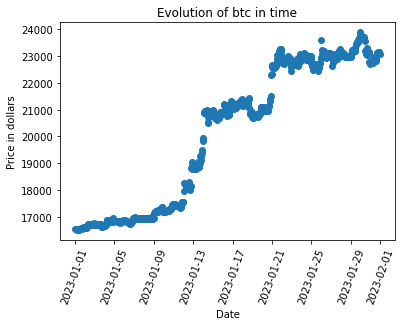

In [25]:
plot_2(klines_btc_2, 'btc')

# XGBOOST 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from binance.client import Client
from binance import ThreadedWebsocketManager, ThreadedDepthCacheManager
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import os
import datetime
import time

os.chdir('C:/Users/Axel')
from crypto_data_import import *

api_key = "2lLsro9E1j6RB0HRP1Z8LyYlcMIzi2JnjZbndidaWVn3tWBOuL8bl9ghMYoPExBf"
api_secret = "QPZ0EX9tobahvAE9krisOVE8UgWb2NMouBNDEaMAP2YsY3QZ1OqCLZWMyLOWKFd1"

client = Client(api_key, api_secret)


# get all symbol prices
prices = client.get_all_tickers()


# fetch klines from the 1st december of 2016 until today

#klines_btc = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "1 Dec, 2016")

crypto = "BTCUSDT"
date = "1 Jan, 2023"

df_crypto = get_clean_data(crypto, date)


def reshaping(L, n):
    res = [L[i:i+n+1] for i in range(len(L)-n)]
    resy = [k[-1] for k in res]
    resx = [k[0:-1] for k in res]
    return resx, resy


In [ ]:

def prediction(model, X_train, N):

    X = X_train[-1].tolist().copy()
    Y = []

    for i in range(N):
        y = model.predict(np.array(X).reshape(1,-1))
        Y.append(y[0])
        X = list(X)
        X.remove(X[0])
        X.append(Y[-1])

    return [k for k in range(len(Y) + N)], [k for k in Y]




In [ ]:

crypto_ = "ETHUSDT"
date_ = "1 Jan, 2022"

def future_sight(crypto, date, N):
    #print("Process started...")
    klines = client.get_historical_klines(crypto, Client.KLINE_INTERVAL_15MINUTE, date)
    #print("Data fetched...")
    columns_ = ['open_time', 'open', 'high', 'low', 'close', 'volume']

    data = [[int(k[0]), float(k[1]), float(k[2]), float(k[3]), float(k[4]), float(k[5])] for k in klines]

    data = pd.DataFrame(data, columns = columns_)
    data_open = data.open.tolist()

    X_train1, y_train1 = reshaping(data_open, 10)

    X_train = np.array(X_train1)
    y_train = np.array(y_train1)
    #print("Data preprocessed...")
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    #print("Model trained...")
    x2 = [k for k in range(len(y_train[-10:]))]
    plt.plot([k - x2[-1] for k in x2], y_train[-10:], 'b-', label = "real")
    x, y = prediction(model, X_train, N)
    plt.plot([k - len(x2) +1 for k in range(x2[-1], x2[-1] + len(y))], y, 'r-', label = "predicted")
    plt.grid()
    plt.legend()
    plt.show()
    return y





In [ ]:
reshaping(prices, 3)

# XGBOOST 2

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# retrieve historical price data for BTC from Binance API
symbol = "BTCUSDT"
interval = "1d"
url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}"
response = requests.get(url)
data = response.json()

# convert data to pandas DataFrame
df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)

# create features and target
df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']
df['Target'] = df['Close'].shift(-1)
df = df.dropna()
X = df[['Open-Close', 'High-Low']]
y = df['Target']

# split data into training and testing sets
train_size = int(len(df) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# train XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 9674.280675686214


In [30]:
plot(y_pred)

array([20678.01 , 28774.463, 19858.363, 29575.342, 31600.504, 24142.566,
       43801.13 , 25464.955, 21606.898, 24673.025, 33245.04 , 32293.379,
       26374.469, 22445.746, 23658.691, 24740.215, 25829.637, 16737.19 ,
       56619.93 , 18689.47 , 28631.69 , 23170.379, 21667.152, 28461.715,
       32891.555, 33219.39 , 30396.598, 24754.553, 21997.443, 26838.031,
       24911.742, 34811.285, 19241.178, 21568.225, 23371.4  , 21997.443,
       24142.566, 28380.537, 21882.564, 23436.062, 39948.7  , 25090.309,
       26409.29 , 23660.387, 22566.496, 20537.242, 19858.363, 22753.396,
       22988.014, 24142.566, 12667.622, 22946.838, 36972.34 , 23331.816,
       24402.281, 24068.658, 23220.553, 16729.43 , 19400.398, 20168.273,
       27092.06 , 25073.832, 14551.24 , 28774.463, 21862.588, 33621.65 ,
       43229.44 , 43159.688, 57211.016, 29540.96 , 26838.031, 39360.05 ,
       29709.213, 23064.764, 22833.193, 24142.566, 22496.266, 19129.113,
       22959.98 , 31193.527, 34918.215, 20242.588, 

[23:27:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 3262.516990159405


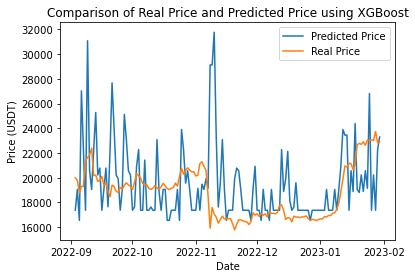

In [7]:
import requests
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# retrieve historical price data for BTC from Binance API
symbol = "BTCUSDT"
interval = "1d"
url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}"
response = requests.get(url)
data = response.json()

# convert data to pandas DataFrame
df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df = df.set_index('Open time')

# create features and target
df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']
df['Target'] = df['Close'].shift(-1)
df = df.dropna()
X = df[['Open-Close', 'High-Low']]
y = df['Target']

# split data into training and testing sets
train_size = int(len(df) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# create XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# train XGBoost model
xg_reg.fit(X_train, y_train)

# make predictions
y_pred = xg_reg.predict(X_test)

# evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# plot the predictions
plt.plot(y_test.index, y_pred, label="Predicted Price")
plt.plot(y_test.index, y_test, label="Real Price")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.title("Comparison of Real Price and Predicted Price using XGBoost")
plt.show()


# TENSORFLOW

In [34]:
pip install tensorflow

In [8]:
import requests
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error

# retrieve historical price data for BTC from Binance API
symbol = "BTCUSDT"
interval = "1d"
url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}"
response = requests.get(url)
data = response.json()

# convert data to pandas DataFrame
df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)

# create features and target
df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']
df['Target'] = df['Close'].shift(-1)
df = df.dropna()
X = df[['Open-Close', 'High-Low']]
y = df['Target']

# split data into training and testing sets
train_size = int(len(df) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# create TensorFlow model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# train TensorFlow model
model.fit(X_train, y_train, epochs=100, verbose=0)

# make predictions
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

# evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


5/5 [==============================] - 0s 2ms/step
RMSE: 11363.506165085917


In [36]:
y_pred

array([ 5828.3574,  7188.0435,  5929.069 , 20836.11  , 15749.715 ,
        6831.613 , 40497.055 , 11324.601 ,  8176.1704, 15891.173 ,
       39622.926 , 14101.195 , 11384.549 ,  8879.166 ,  7533.945 ,
       10430.606 , 22255.617 , 12505.305 , 26643.709 , 20640.62  ,
       14376.466 ,  6934.2847,  8069.189 , 10800.416 , 23356.871 ,
       20741.426 , 12574.697 , 15161.497 ,  4659.977 ,  6589.4644,
       13062.465 , 16827.977 ,  9188.055 ,  8661.54  , 10287.897 ,
        5649.512 ,  3738.584 ,  6921.024 ,  6016.412 ,  4381.2036,
       20539.94  , 12851.91  ,  3582.4238,  6013.707 ,  8717.766 ,
        8786.662 ,  4017.3145,  6592.685 ,  9382.926 ,  2307.161 ,
       10444.871 ,  6151.327 , 19850.793 , 16558.914 ,  9125.427 ,
       12104.    ,  8602.865 ,  5871.5117,  8874.961 ,  5587.487 ,
       10576.705 ,  5632.095 , 19559.365 ,  6449.1836,  6446.6294,
        9604.6455, 48412.816 , 40004.504 , 41501.37  , 18861.848 ,
        6766.8203,  9881.373 , 21473.395 ,  9929.909 ,  9072.6

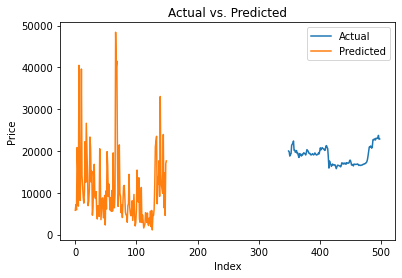

In [39]:
import matplotlib.pyplot as plt

# Plot the predictions
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs. Predicted")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()


5/5 [==============================] - 0s 2ms/step
RMSE: 11382.585063154229


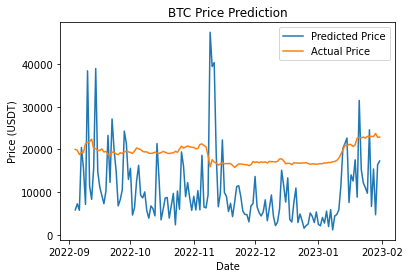

In [9]:
import requests
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# retrieve historical price data for BTC from Binance API
symbol = "BTCUSDT"
interval = "1d"
url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}"
response = requests.get(url)
data = response.json()

# convert data to pandas DataFrame
df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
df['Date'] = pd.to_datetime(df['Close time'], unit='ms')

# create features and target
df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']
df['Target'] = df['Close'].shift(-1)
df = df.dropna()
X = df[['Open-Close', 'High-Low']]
y = df['Target']

# split data into training and testing sets
train_size = int(len(df) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# create TensorFlow model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# train TensorFlow model
model.fit(X_train, y_train, epochs=100, verbose=0)

# make predictions
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

# evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# plot predictions
plt.plot(df['Date'][train_size:], y_pred, label='Predicted Price')
plt.plot(df['Date'][train_size:], y_test, label='Actual Price')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.title('BTC Price Prediction')
plt.legend()
plt.show()


# PCA

RMSE: 19845.069410094427


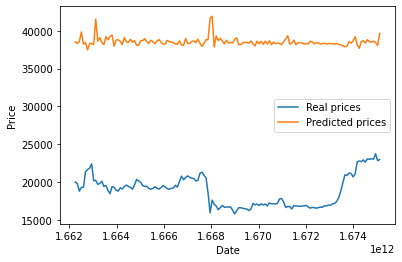

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# create PCA model
pca = PCA(n_components=1)
pca.fit(X_train)

# transform training and testing data using PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# train linear regression model on PCA transformed data
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_pca, y_train)

# make predictions on PCA transformed testing data
y_pred = reg.predict(X_test_pca)

# calculate rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# plot real prices against predicted prices
dates_test = df.iloc[train_size:]['Close time']
plt.plot(dates_test, y_test, label="Real prices")
plt.plot(dates_test, y_pred, label="Predicted prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


# LightGBM

RMSE: 9676.741488352865


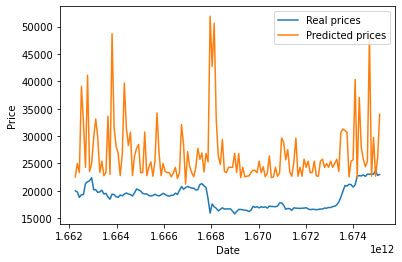

In [48]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# train LightGBM model
gbm = lgb.LGBMRegressor().fit(X_train, y_train)

# make predictions
y_pred = gbm.predict(X_test)

# calculate rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# plot real prices against predicted prices
dates_test = df.iloc[train_size:]['Close time']
plt.plot(dates_test, y_test, label="Real prices")
plt.plot(dates_test, y_pred, label="Predicted prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [47]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


# —	Decision Tree Regressor (Tree)



RMSE: 12141.043006500937


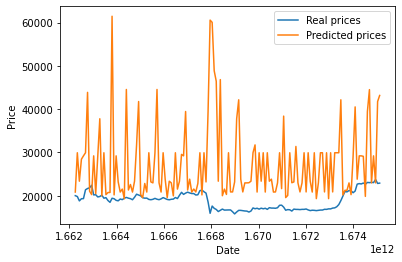

In [10]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# train Decision Tree Regressor model
dt = DecisionTreeRegressor().fit(X_train, y_train)

# make predictions
y_pred = dt.predict(X_test)

# calculate rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# plot real prices against predicted prices
dates_test = df.iloc[train_size:]['Close time']
plt.plot(dates_test, y_test, label="Real prices")
plt.plot(dates_test, y_pred, label="Predicted prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


# —	Gradient Boosting Regressor (GB)

RMSE: 9442.720378953523


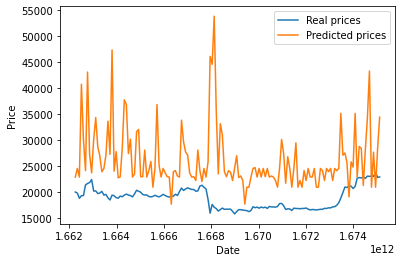

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# train Gradient Boosting Regressor model
gbr = GradientBoostingRegressor().fit(X_train, y_train)

# make predictions
y_pred = gbr.predict(X_test)

# calculate rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# plot real prices against predicted prices
dates_test = df.iloc[train_size:]['Close time']
plt.plot(dates_test, y_test, label="Real prices")
plt.plot(dates_test, y_pred, label="Predicted prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


# CONCLUSION